<a href="https://colab.research.google.com/github/snmsanjay/data_science_and_making_data_decision/blob/main/Lab2_CE888.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Importing data
df_customers = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
cust = df_customers.values.T[1]


In [ ]:
# Define a function for calculating the mean using bootstrap for 95% CI
def bootstrap_mean(x, n_x, n_b):
  # 1
    temp = np.random.choice(x,(n_b,n_x))
  # 2
    mean = np.mean(temp)
  # 3
    means = np.mean(temp,axis=1)
  # 4
    lower = np.percentile(means, 2.5)
  # 5
    upper = np.percentile(means, 97.5)
    
    return mean, lower, upper

In [ ]:
bootstrap_mean(cust,cust.shape[0],1000)


(9.261214285714285, 6.428571428571429, 12.357142857142858)

In [ ]:
# Calculate the mean and its 95% CI with different bootstrap's number
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(cust, cust.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    

In [ ]:
# Create a dataframe for the mean 
df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
df_boot

,Bootstrap Iterations,Mean,Value
0,100,9.240000,mean
1,100,6.176786,lower
2,100,11.823214,upper
3,1100,9.173831,mean
4,1100,6.500000,lower
...,...,...,...
145,48100,6.428571,lower
146,48100,12.285714,upper
147,49100,9.215557,mean
148,49100,6.428571,lower


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


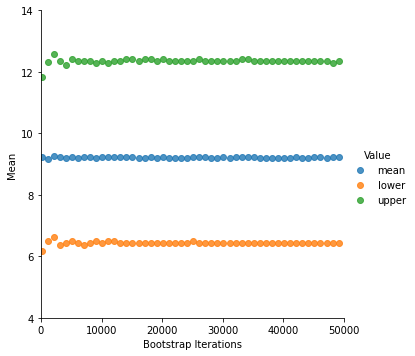

In [ ]:
# Plot the means for different number of bootstrap
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(4,14)
sns_plot.axes[0, 0].set_xlim(0, 50000)

sns_plot.savefig("bootstrap_confidence_95.pdf", bbox_inches='tight')

In [ ]:
# Define functions for upper and lower bounds
l = lambda x1,x2: np.percentile(x1,(100-x2)/2)
u = lambda x1,x2: np.percentile(x1,100-((100-x2)/2))

In [ ]:
# Define a function for calculating the mean using bootstrap for any CI
def bootstrap_mean_ci(x, n_x, n_b, ci):
  # 1
    temp = np.random.choice(x,(n_b,n_x))
  # 2
    mean = np.mean(temp)
  # 3
    means = np.mean(temp,axis=1)
  # 4
    lower = l(means,ci)
  # 5
    upper = u(means,ci)
    
    return mean, lower, upper

In [ ]:
bootstrap_mean_ci(cust,cust.shape[0],1000,90)

(9.256928571428572, 6.928571428571429, 11.857142857142858)

In [ ]:
# Calculate the mean and its 80% CI with different bootstrap's number
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(cust,cust.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

In [ ]:
# Create a dataframe for the mean 
df_boot_ci = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
df_boot_ci

,Boostrap Iterations,Mean,Value
0,100,30.376203,mean
1,100,28.866772,lower
2,100,31.726582,upper
3,1100,30.487434,mean
4,1100,29.132595,lower
...,...,...,...
145,48100,29.151899,lower
146,48100,31.810127,upper
147,49100,30.481948,mean
148,49100,29.151899,lower


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


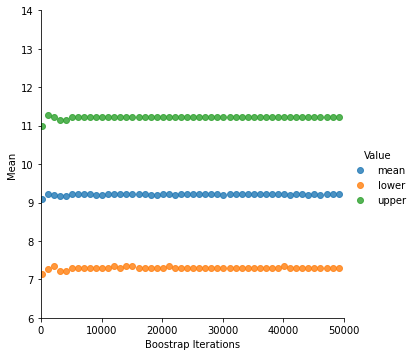

In [ ]:
# Plot the means for different number of bootstrap
sns_plot = sns.lmplot(df_boot_ci.columns[0], df_boot_ci.columns[1], data=df_boot_ci, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(6,14)
sns_plot.axes[0, 0].set_xlim(0, 50000)

sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

***Vehicles*** **dataset**


In [ ]:
# Import dats for Vehicles
df_v = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df_v

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [ ]:
# convert the columns in dataframe to two separate arrays
current = df_v.values.T[0]
new = df_v.values.T[1]
new = new[np.logical_not(np.isnan(new))]

In [ ]:
new

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32.])

In [ ]:
#find means of current and new
current_mean = np.mean(current)
new_mean = np.mean(new)

print('The mean value for Current is: {}, and the mean value for New is: {}'.format(round(current_mean, 3),
                                                                                    round(new_mean,3)))

The mean value for Current is: 20.145, and the mean value for New is: 30.481


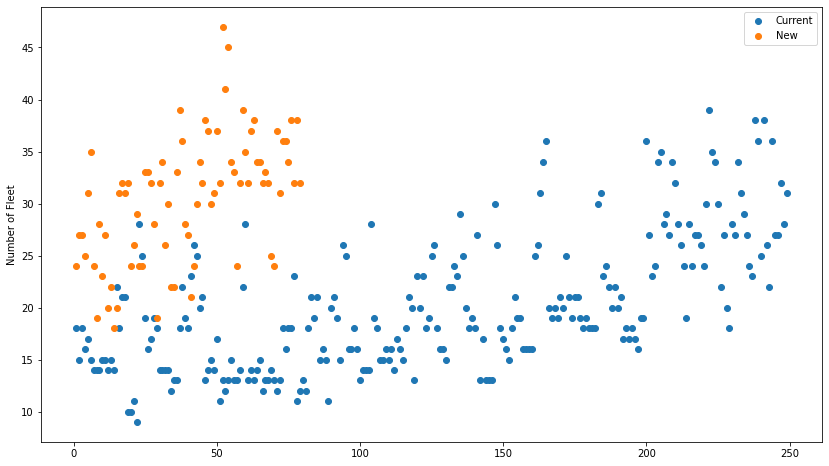

In [ ]:
# Plot New and Current in the same figure

x1=np.linspace(1,len(current),current.size)
x2 = np.linspace(1,len(new),new.size)

fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.scatter(x1,current,label="Current")
plt.scatter(x2,new,label="New")
plt.legend()
plt.ylabel("Number of Fleet")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


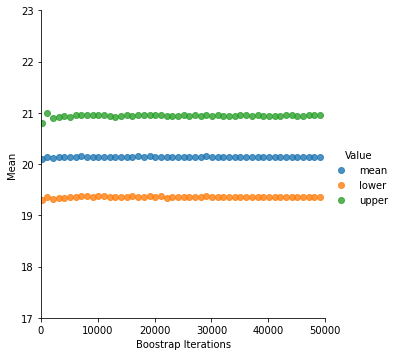

In [ ]:
# Calculate the mean and its 95% CI with different bootstrap's number for current fleet

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(current, current.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

# Create a dataframe for the means of current fleet 
df_boot_c = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])

# Plot the mean and the 95% CI for current fleet
sns_plot = sns.lmplot(df_boot_c.columns[0], df_boot_c.columns[1], data=df_boot_c, fit_reg=False, hue="Value")
sns_plot.axes[0, 0].set_ylim(17,23)
sns_plot.axes[0, 0].set_xlim(0, 50000)
sns_plot.savefig("bootstrap_confidence_95_current.pdf", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


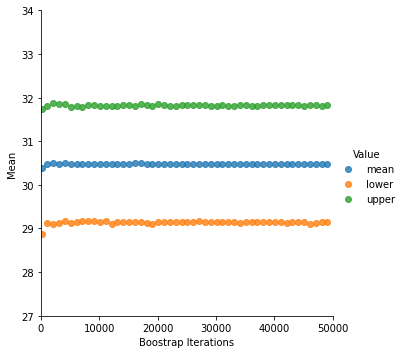

In [ ]:
# Calculate the mean and its 95% CI with different bootstrap's number for new fleet

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new, new.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

# Create a dataframe for the means of new fleet 
df_boot_n = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])

# Plot the mean and the 95% CI for new fleet
sns_plot = sns.lmplot(df_boot_n.columns[0], df_boot_n.columns[1], data=df_boot_n, fit_reg=False, hue="Value")
sns_plot.axes[0, 0].set_ylim(27,34)
sns_plot.axes[0, 0].set_xlim(0, 50000)
sns_plot.savefig("bootstrap_confidence_95_new.pdf", bbox_inches='tight')

In [ ]:
def permut_test(sample1, sample2, n_permutations):
    t_obs = np.mean(sample2) - np.mean(sample1)
    c = 0
    t_perm = np.zeros(n_permutations)
    for i in range(n_permutations):
        temp = np.concatenate((sample1, sample2))
        perm = np.random.permutation(temp)
        p_cur = perm[:len(sample1)]
        p_new = perm[len(sample1):]

        p_cur_mean = np.mean(p_cur)
        p_new_mean = np.mean(p_new)

        t_perm[i] = p_new_mean - p_cur_mean
        if t_perm[i]>t_obs:
            c+=1
    p_value = round(c/n_permutations,3)
    
    return p_value, t_perm, t_obs

In [ ]:
res = permut_test(current, new, 30000)
print('The p-value is: {},\n The t_obs is: {}, and \n The mean of t_perm is: {}'.format(res[0],res[2],np.mean(res[1]))) 

The p-value is: 0.0,
 The t_obs is: 10.336434344974837, and 
 The mean of t_perm is: 0.013355091251080285
